In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [5]:
# We Separate the dataset
from implementations import *

tX_list, ids_list, y_list = separate_dataset(tX, ids, y)
tX_test_list, ids_test_list = separate_dataset(tX_test, ids_test) 

## Grid search

In [6]:
import seaborn as sns
import matplotlib.pylab as plt

def grid_search_lists(y, tX, function, log = False, k_fold = 4, degrees = range(1, 15), lambdas = np.logspace(-8, -1, 35)):
    # Ridge regression with K-fold
    k_indices = build_k_indices(y, k_fold)

    rmse_te_tmp = []
    degree_by_lambda = []
    BestLambdaForDeg=[]
    for index_degree, degree in enumerate(degrees):
        rmse_te_tmp2 = []
        for index_lambda, lambda_ in enumerate(lambdas):
            loss_te_tmp = 0
            for k in range(k_fold):
                _, loss_te, _ = cross_validation(y, tX, k_indices, k, degree, function, (lambda_,), log)
                loss_te_tmp = loss_te_tmp + loss_te
            rmse_te_tmp2.append(np.sqrt(2 * loss_te_tmp / k_fold))
        rmse_te_tmp.append(min(rmse_te_tmp2))
        degree_by_lambda.append(rmse_te_tmp2)
        BestLambdaForDeg.append(lambdas[np.argmin(rmse_te_tmp2)])
    BestDeg = degrees[np.argmin(rmse_te_tmp)]
    BestLambda = BestLambdaForDeg[np.argmin(rmse_te_tmp)]
    rmse_te = min(rmse_te_tmp)

    return rmse_te, BestDeg, BestLambda, degree_by_lambda

Dataset part 0:


/home/main/.local/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


     Best degree: 1
     Best lambda: 0.001403003723190572
     Loss: 0.7380144434174976


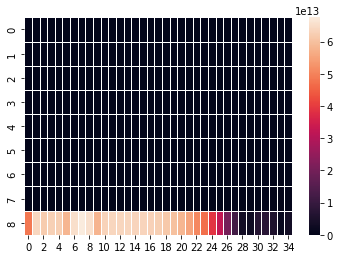

Dataset part 1:
     Best degree: 5
     Best lambda: 0.024118646996409948
     Loss: 0.8063572174043113


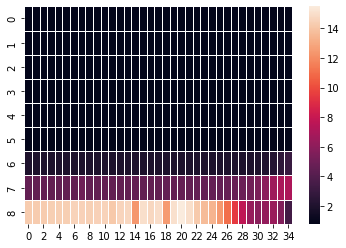

Dataset part 2:
     Best degree: 4
     Best lambda: 0.005817091329374358
     Loss: 0.7844892484607215


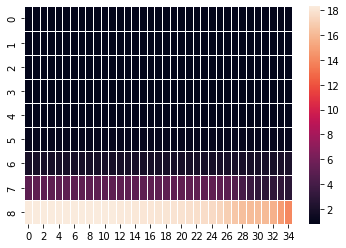

In [7]:
function = ridge_regression
degree_vec = []
lambda_vec = []
for i in range(3):
    print('Dataset part {l}:'.format(l = i))
    rmse_te, BestDeg, BestLambda, degree_by_lambda = grid_search_lists(y_list[i], tX_list[i], function, True, degrees= range(1, 10))
    degree_vec.append(BestDeg)
    lambda_vec.append(BestLambda)
    print('     Best degree: {d}'.format(d = BestDeg))
    print('     Best lambda: {m}'.format(m = BestLambda))
    print('     Loss: {lo}'.format(lo = rmse_te))

    ax = sns.heatmap(degree_by_lambda, linewidth=0.5)
    plt.show()

<AxesSubplot:>

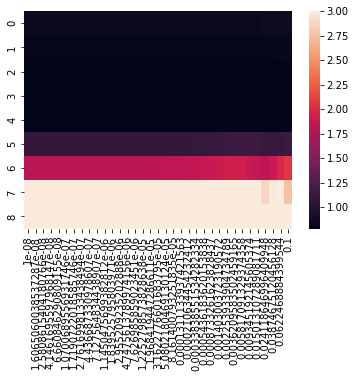

In [19]:
sns.heatmap(degree_by_lambda, vmax=3, xticklabels=np.logspace(-8, -1, 35))

In [12]:
np.array(degree_by_lambda).shape

(9, 35)

In [ ]:
weights_list = []
loss_list = []
mat_tX_test_list = []

for i in range(3):
    mat_tX, mat_tX_test = build_poly_log(tX_list[i], degree_vec[i], True, tX_test_list[i])
    w, l = ridge_regression(y_list[i], mat_tX, lambda_vec[i])
    weights_list.append(w)
    loss_list.append(l)
    mat_tX_test_list.append(mat_tX_test)

## Gradient descent

In [ ]:
# Linear regression using gradient descent
initial_w = np.zeros(tX.shape[1])
max_iters = 50
gamma = 3e-7

weights, loss = least_squares_GD(y, tX, initial_w, max_iters, gamma)

## Least squares

In [ ]:
# Least squares regression using normal equation
weights, loss = least_squares(y, tX)
loss

## Ridge regression

In [ ]:
# Ridge regression using normal equations
lambda_ = 1e-3
weights, loss = ridge_regression(y, tX, lambda_)
loss

In [ ]:
# Ridge regression with data augmentation
lambda_ = 1e-3
mat_tX = build_poly(tX, 5)
weights, loss = ridge_regression(y, mat_tX, lambda_)

loss

In [ ]:
# Ridge regression with separated data
lambda_ = 1e-3
weights_list, loss_list = separated_train(tX_list, y_list, ridge_regression, lambda_)

In [ ]:
# Ridge regression on separated datset with data augmentation
lambda_ = 1e-3
mat_tX_list = build_poly_separated(tX_list, 3)
# weights, loss = ridge_regression(y_list[0], mat_tX_list[0], lambda_)

weights_list, loss_list = separated_train(mat_tX_list, y_list, ridge_regression, lambda_)

## Logistic regression

In [ ]:
weights_list = []
max_iters = 1500
gamma = 1e-4
mat_tX_test_list = []

for i in range(3):
    mat_tX_list = build_poly(tX_list[i], 1)
    initial_w = np.zeros((mat_tX_list.shape[1], 1))
    w, _ = logistic_regression(np.where(y_list[i] == -1, 0, y_list[i]), mat_tX_list, initial_w, max_iters, gamma)
    weights_list.append(w)
    mat_tX_test_list.append(tX_test_list[i])

In [ ]:
#Log Reg Pen


degree_vec = [1]
lambda_vec = [1e-05]
gamma_vec = [1e-2]

weights_list = []
loss_list = []
mat_tX_test_list = []
max_iter= 100

for i in range(3):
    print("loop")
    mat_tX, mat_tX_test = build_poly_log(tX_list[i], degree_vec[0], False, tX_test_list[i])
    initial_w = np.zeros((mat_tX.shape[1], 1))
    l, w = logistic_regression_penalized_gradient_descent(y_list[i], mat_tX, initial_w, max_iter, gamma_vec[0], lambda_vec[0])
    print(l)
    weights_list.append(w)
    loss_list.append(l)
    mat_tX_test_list.append(mat_tX_test)

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [ ]:
# Separated dataset
OUTPUT_PATH = 'result.csv' # TODO: fill in desired name of output file for submission

tX_test_list, ids_test_list = separate_dataset(tX_test, ids_test)
y_pred_list = separated_eval(weights_list, tX_test_list)

y_pred = np.concatenate((y_pred_list[0], y_pred_list[1], y_pred_list[2], y_pred_list[3]))
ids_test_sub = np.concatenate((ids_test_list[0], ids_test_list[1], ids_test_list[2], ids_test_list[3]))

create_csv_submission(ids_test_sub, y_pred, OUTPUT_PATH)

In [ ]:
# Data augmentation and separated dataset
OUTPUT_PATH = 'result.csv' # TODO: fill in desired name of output file for submission

tX_test_list, ids_test_list = separate_dataset(tX_test, ids_test)   #separate dateset

mat_tX_test_list = []

# for i in range(4):
#     print(i)
#     mat_tX_test = build_poly(tX_test_list[i], degree_vec[i])
#     mat_tX_test_list.append(mat_tX_test)

# mat_tX_test_list = build_poly_separated(tX_test_list, 3)            #data augmentation
y_pred_list = separated_eval(weights_list, mat_tX_test_list)        #prediction

y_pred = np.concatenate((y_pred_list[0], y_pred_list[1], y_pred_list[2], y_pred_list[3]))
ids_test_sub = np.concatenate((ids_test_list[0], ids_test_list[1], ids_test_list[2], ids_test_list[3]))

create_csv_submission(ids_test_sub, y_pred, OUTPUT_PATH)